# Previsão de Votação de Deputados com NumPy e Sklearn

Abaixo ferei um paralelo entre três implementações de regressão multipla em Python. Uma utilizará o algoritmo iterativo, outra fará uso da fórmula fechada e as duas ultimas irão usar bibliotecas específicas chamadas Sklearn e NumPy

## Dados

Foi utilizado um conjunto de dados com seis colunas numéricas. As cinco primeiras descrevem as notas em avaliações do primeiro semestre para um conjunto de alunos. A ultima coluna de dados representa o CRA do mesmo dado aluno ao concluir o curso em questão.

## Objetivo

O objetivo aqui é construir um modelo de descrição utilizando Regressão Linear Multipla para os dados apresentados e comparar o desempenho das quatro alternativas de implementação.

In [33]:
#from sklearn import linear_model
#import numpy.linalg as lin
#import math
#import time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [34]:
train = pd.read_csv("../data/eleicoes_2006_a_2010_treino.csv")
#test = pd.read_csv("../data/eleicoes_2006_a_2010_teste.csv")

In [35]:
train.head()

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos/comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,votos
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.666667,NaN,...,14,14,16583.60,1184.542857,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,8579
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.846154,6625.0,...,24,23,20325.99,883.738696,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,2757
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,148120.80,9257.550000,2250.0,...,123,108,146011.70,1351.960185,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,17428
3,2006,10002,ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.186667,NaN,...,8,8,3001.12,375.140000,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,1193
4,2006,10003,ANSELMO DE JESUS ABREU,RO,PT,48,48,NaN,NaN,NaN,...,133,120,116416.64,970.138667,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,29401


In [36]:
train = train.drop(columns=['nome'])
train = train.drop(columns=['sequencial_candidato'])

train = pd.get_dummies(train)

train = train.fillna(train.mean())

In [37]:

train = train.drop(columns=['quantidade_doacoes'])
train = train.drop(columns=['quantidade_doadores'])
train["total_receita"] = np.log1p(train["total_receita"])
train["media_receita"] = np.log1p(train["media_receita"])
train["recursos_de_outros_candidatos/comites"] = np.log1p(train["recursos_de_outros_candidatos/comites"])
train = train.drop(columns=['quantidade_despesas'])
train = train.drop(columns=['quantidade_fornecedores'])
train["total_despesa"] = np.log1p(train["total_despesa"])
train["media_despesa"] = np.log1p(train["media_despesa"])
train["votos"] = np.log1p(train["votos"])

In [38]:


matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
quantidade_doacoes = pd.DataFrame({"quantidade_doacoes":train["quantidade_doacoes"], "log(quantidade_doacoes + 1)":np.log1p(train["quantidade_doacoes"])})
quantidade_doacoes.hist()
quantidade_doacoes = pd.DataFrame({"quantidade_doadores":train["quantidade_doadores"], "log(quantidade_doadores + 1)":np.log1p(train["quantidade_doadores"])})
quantidade_doacoes.hist()
quantidade_doacoes = pd.DataFrame({"total_receita":train["total_receita"], "log(total_receita + 1)":np.log1p(train["total_receita"])})
quantidade_doacoes.hist()
quantidade_doacoes = pd.DataFrame({"media_receita":train["media_receita"], "log(media_receita + 1)":np.log1p(train["media_receita"])})
quantidade_doacoes.hist()
quantidade_doacoes = pd.DataFrame({"recursos_de_outros_candidatos/comites":train["recursos_de_outros_candidatos/comites"], "log(recursos_de_outros_candidatos/comites + 1)":np.log1p(train["recursos_de_outros_candidatos/comites"])})
quantidade_doacoes.hist()
quantidade_doacoes = pd.DataFrame({"quantidade_despesas":train["quantidade_despesas"], "log(quantidade_despesas + 1)":np.log1p(train["quantidade_despesas"])})
quantidade_doacoes.hist()
quantidade_doacoes = pd.DataFrame({"quantidade_fornecedores":train["quantidade_fornecedores"], "log(quantidade_fornecedores + 1)":np.log1p(train["quantidade_fornecedores"])})
quantidade_doacoes.hist()
quantidade_doacoes = pd.DataFrame({"total_despesa":train["total_despesa"], "log(total_despesa + 1)":np.log1p(train["total_despesa"])})
quantidade_doacoes.hist()
quantidade_doacoes = pd.DataFrame({"media_despesa":train["media_despesa"], "log(media_despesa + 1)":np.log1p(train["media_despesa"])})
quantidade_doacoes.hist()
quantidade_doacoes = pd.DataFrame({"votos":train["votos"], "log(votos + 1)":np.log1p(train["votos"])})
quantidade_doacoes.hist()

KeyError: 'quantidade_doacoes'

C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.387903e-18
  overwrite_a=True).T
C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.412608e-18
  overwrite_a=True).T
C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.766678e-18
  overwrite_a=True).T
C:\Users\tclem\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.692133e-18
  overwrite_a=True).T
C:\Users

Text(0,0.5,'rmse')

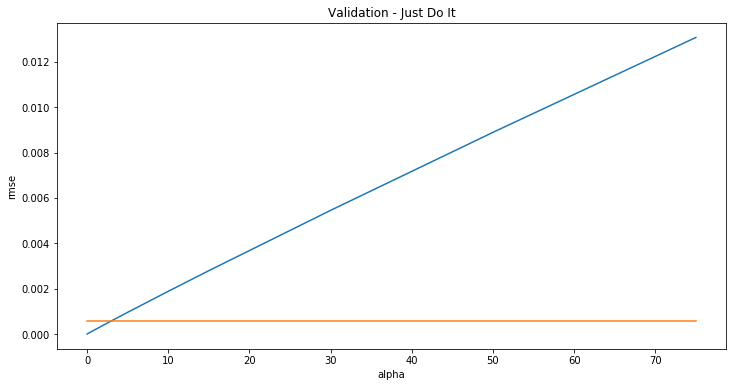

In [39]:
#log transform skewed numeric features:
numeric_feats = train.dtypes[train.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

y = train.votos

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score



#X_train = all_data[:train.shape[0]]

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge()


alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

model_lasso= LassoCV(alphas = alphas).fit(train, y)

rmse_cv(model_lasso).mean()


cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_lasso = [rmse_cv(model_lasso).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

#### Norma L2

$||\mathbf{w}||_2 = \sqrt{\sum_{j=1}^D w_j^2}$

In [3]:
def norm_2(x):
    c=0
    for i in range(len(x)):
        c += x[i]**2
    return math.sqrt(c)

## MSE (Versão Vetorizada)

Função para calcular o MSE (Mean Squared Error):

$MSE(\hat{w})=\frac{1}{N}(y-\mathbf{H}\hat{\mathbf{w}})^T(y-\mathbf{H}\hat{\mathbf{w}})$

In [4]:
def compute_mse_vectorized(w,H,Y):
    res = Y - np.dot(H,w)
    totalError = np.dot(res.T,res)
    return totalError / float(len(Y))

## Regressão multipla


### Algoritmo de Gradiente Descendente (versão vetorizada)

#### Atualização dos coeficientes

Função para fazer uma atualização dos parâmetros no Gradiente Descendente:

$w^{(t+1)} = {\displaystyle \nabla }w^{(t)} + 2\alpha[H^T(y - Hw)]$

In [5]:
def step_gradient_vectorized(w_current,H,Y,learningRate):
    res = Y - np.dot(H,w_current)
    gradient = -2 * np.dot((H.transpose()),res)
    new_w = w_current - learningRate * gradient
    return [gradient,new_w]

#### Laço de Iteração)

Função para iterar sobre o gradiente descendente até convergência.

In [6]:
def gradient_descent_runner_vectorized(starting_w, H,Y, learning_rate, epsilon):
    w = starting_w
    gradient = np.array([[np.inf]])
    for i in range(0, len(H[0,:])-2):
        gradient = gradient[:][:,np.newaxis]
    i = 0
    while (np.linalg.norm(gradient)>=epsilon):
        gradient,w = step_gradient_vectorized(w, H, Y, learning_rate)
        i+= 1
    return [gradient,w]

### Gradiente descendente (fórmula fechada)

Função que retorna o Gradiente Descendente de forma fechada:

$\hat w = (H^TH)^{-1}H^Ty$

In [7]:
def gradient_descent_runner_vectorized_fixed(starting_w, H,Y, learning_rate):
    w = np.dot(lin.inv(np.dot(H.transpose(),H)),np.dot(H.transpose(),Y))
    gradient,w_aux = step_gradient_vectorized(w, H, Y, learning_rate)
    return [gradient,w]

## Método Principal:

In [15]:
points = np.genfromtxt("../data/sample_treino.csv", delimiter=",")
points = np.c_[np.ones(len(points)),points]
H = points[:,0:-1]
Y = points[:,-1][:,np.newaxis]
init_w = np.zeros((len(points[0,:])-1,1))
learning_rate = 0.00002
epsilon = 0.5

print("Começando com MSE = {0}".format(compute_mse_vectorized(init_w, H,Y)))
print("Vamos lá...")
print('\n')

# *** sklearn ***
print('*********SKLEARN*********')
print('\n\n')
regr = linear_model.LinearRegression()
tic = time.time()
regr.fit(H, Y)
toc = time.time()
# incuindo o "intercet" no array com os demais coeficientes
w_ = regr.coef_
w_[0,0] = regr.intercept_

print('Coeficientes: ', w_)
print('Norma dos coeficientes: ', np.linalg.norm(w_))
print('MSE: ', compute_mse_vectorized(w_.transpose(),H,Y))
print("Tempo de processamento: " + str(1000*(toc-tic)) + " ms")
print('\n')

# *** numpy ***
print('*********NUMPY*********')
print('\n\n')
tic = time.time()
w0 = lin.lstsq(H,Y)[0]
toc = time.time()
#redistribuindo array de duas dimensões em uma só
print('Coeficientes: ', [w0[0,0],w0[1,0],w0[2,0],w0[3,0],w0[4,0],w0[5,0]])
print('Norma dos coeficientes: ', np.linalg.norm([w0[0,0],w0[1,0],w0[2,0],w0[3,0],w0[4,0],w0[5,0]]))
print('MSE: ', compute_mse_vectorized(w0,H,Y))
print("Tempo de processamento: " + str(1000*(toc-tic)) + " ms")
print('\n')

# *** fórmula fechada ***
print('*********FÓRMULA FECHADA*********')
print('\n\n')
tic = time.time()
gradient,w2 = gradient_descent_runner_vectorized_fixed(init_w, H,Y, learning_rate)
toc = time.time()
print('Coeficientes: ', [w2[0,0],w2[1,0],w2[2,0],w2[3,0],w2[4,0],w2[5,0]] )
print('Norma dos coeficientes: ', np.linalg.norm(w2))
print('MSE: ', compute_mse_vectorized(w2,H,Y))
print("Tempo de processamento: " + str(1000*(toc-tic)) + " ms")
print('\n')
#print("Gradiente descendente convergiu com gradient norm = {0}, error = {1}".format(np.linalg.norm(w2), compute_mse_vectorized(w2,H,Y)))
#print("Versão vetorizada rodou em: " + str(1000*(toc-tic)) + " ms")


# *** algoritmo ***
print('*********ALGORITMO ITERATIVO*********')
print('\n\n')
tic = time.time()
gradient,w = gradient_descent_runner_vectorized(init_w, H,Y, learning_rate, epsilon)
toc = time.time()
print('Coeficientes: ', [w[0,0],w[1,0],w[2,0],w[3,0],w[4,0],w[5,0]])
print('Norma dos coeficientes: ', np.linalg.norm(w))
print('MSE: ', compute_mse_vectorized(w,H,Y))
print("Tempo de processamento: " + str(1000*(toc-tic)) + " ms")


#print("Gradiente descendente convergiu com gradient norm = {0}, error = {1}".format(np.linalg.norm(w), compute_mse_vectorized(w,H,Y)))
#print("Versão vetorizada rodou em: " + str(1000*(toc-tic)) + " ms")


Começando com MSE = [[54.47995386]]
Vamos lá...


*********SKLEARN*********



Coeficientes:  [[1.73771151 0.10304143 0.0464367  0.16409834 0.38117843 0.02027816]]
Norma dos coeficientes:  1.7902658105305211
MSE:  [[0.41133759]]
Tempo de processamento: 0.9999275207519531 ms


*********NUMPY*********



Coeficientes:  [1.7377115137944403, 0.10304143246259861, 0.04643670085073445, 0.16409834419165809, 0.3811784266558142, 0.020278157624844473]
Norma dos coeficientes:  1.790265810530524
MSE:  [[0.41133759]]
Tempo de processamento: 59.999704360961914 ms


*********FÓRMULA FECHADA*********



Coeficientes:  [1.7377115137945367, 0.10304143246259034, 0.04643670085073254, 0.16409834419164415, 0.3811784266558056, 0.020278157624833426]
Norma dos coeficientes:  1.7902658105306137
MSE:  [[0.41133759]]
Tempo de processamento: 1.0020732879638672 ms


*********ALGORITMO ITERATIVO*********





C:\Users\tclem\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Coeficientes:  [1.3307123115082506, 0.11033427195945412, 0.06506237372409354, 0.16317101458364705, 0.4018454461283172, 0.025286660062168665]
Norma dos coeficientes:  1.4056834557589737
MSE:  [[0.41249678]]
Tempo de processamento: 3540.961742401123 ms


## Sumário

1. Numa primeira observação já podemos perceber que, à exceção do Algoritmo Iterativo, todos os métodos utilizados chegaram a praticamente os mesmos valores, em tempos variados.
2. Os três primeiros métodos variam bastantem em tempo de execução, mas o método mais eficiente tende a ser a fórmula fechada.
3. O Algoritmo Iterativo é muito menos eficiente que os demais. Ao passo que todos os demais operam abaixo dos 20 ms, este precisa de aproximadamente 3.5s (na máquina onde este notebook foi testado) para executar. Além disto, ele é o único que diverge significativamente quanto aos resultados.

## Resultados

Tomando o MSE obtido pela fórmula fechada (muito semelhante a Numpy e Sklearn), podemos dizer que a Regressão multipla descreve os dados de treino à uma taxa de erro de 0.41 aproximadamente. Isto significa usandoo modelo obtido e as notas do primeiro semestre de um dado aluno, podemos apontar seu CRA ao concluir o curso à um erro médio de $|0.41|$ aproximadamente.

É importante mencionar que este modelo represeta a os dados de treinamento. Não foram reservados dados para validação ou testes, portanto não se trata e um modelo de predição, apenas descrição.